In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import models, layers
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv("temp_matrix (25).csv")
#check the data types
data.dtypes

timestamp        int64
date            object
time            object
day             object
irradiance     float64
temperature    float64
0              float64
1              float64
2              float64
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
12             float64
13             float64
14             float64
15             float64
16             float64
17             float64
18             float64
19             float64
20             float64
21             float64
22             float64
23             float64
24             float64
25             float64
26             float64
27             float64
28             float64
29             float64
30             float64
31             float64
pmax           float64
SCC              int64
panel           object
dtype: object

In [3]:
#clean data:
clean = data[data.panel=='clean']

#seperating data into frames:

#These are columns that don't need to be normalized
clean1 = clean[['timestamp','date','time','day','panel']]

#everything else minus the timestamp column does need to be normalized
clean2 = clean.select_dtypes(include = ['float64','int64'])
clean2 = clean2.drop(columns=['timestamp'])

In [9]:
#these columns are broken sensors, need to be replaced with 0's:
#01,02,04,07,12,15,16,19,24,27,29,30
clean2.update(clean2[['1','2','4','7','12','15','16','19','24','27','29','30']].fillna(0))
clean2.head()

,irradiance,temperature,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,pmax,SCC
0,557.80,28.21,31.463,0.0,0.0,28.36625,0.0,30.656,29.605,0.0,...,0.0,26.068,25.936,0.0,26.624,0.0,0.0,25.9125,8801.920,673
2,787.00,33.99,45.556,0.0,0.0,46.98625,0.0,47.513,48.333,0.0,...,0.0,46.507,47.690,0.0,44.890,0.0,0.0,47.0325,56452.320,4520
4,916.77,32.31,49.921,0.0,0.0,52.91900,0.0,52.556,53.696,0.0,...,0.0,51.588,53.025,0.0,49.340,0.0,0.0,52.6700,61858.730,5299
6,1033.98,34.46,55.106,0.0,0.0,NaN,0.0,56.144,56.764,0.0,...,0.0,55.483,56.408,0.0,53.876,0.0,0.0,NaN,66282.240,5963
8,1030.84,35.25,55.494,0.0,0.0,55.81500,0.0,55.433,55.040,0.0,...,0.0,53.158,53.786,0.0,51.770,0.0,0.0,52.9100,67181.928,5990


In [10]:
#replacing the remainder NaNs with meaningful values (not 0s)
#by default this will be a linear interpolation unless a different method is specified

new_clean2 = clean2.interpolate()
new_clean2

,irradiance,temperature,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,pmax,SCC
0,557.80,28.21,31.4630,0.0,0.0,28.36625,0.0,30.6560,29.6050,0.0,...,0.0,26.068,25.9360,0.0,26.624,0.0,0.0,25.9125,8801.920,673
2,787.00,33.99,45.5560,0.0,0.0,46.98625,0.0,47.5130,48.3330,0.0,...,0.0,46.507,47.6900,0.0,44.890,0.0,0.0,47.0325,56452.320,4520
4,916.77,32.31,49.9210,0.0,0.0,52.91900,0.0,52.5560,53.6960,0.0,...,0.0,51.588,53.0250,0.0,49.340,0.0,0.0,52.6700,61858.730,5299
6,1033.98,34.46,55.1060,0.0,0.0,54.36700,0.0,56.1440,56.7640,0.0,...,0.0,55.483,56.4080,0.0,53.876,0.0,0.0,52.7900,66282.240,5963
8,1030.84,35.25,55.4940,0.0,0.0,55.81500,0.0,55.4330,55.0400,0.0,...,0.0,53.158,53.7860,0.0,51.770,0.0,0.0,52.9100,67181.928,5990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,3.14,38.30,35.4225,0.0,0.0,35.53250,0.0,35.3775,35.3775,0.0,...,0.0,35.095,35.0775,0.0,35.190,0.0,0.0,34.9875,43498.806,4026
3012,3.14,38.30,35.4225,0.0,0.0,35.53250,0.0,35.3775,35.3775,0.0,...,0.0,35.095,35.0775,0.0,35.190,0.0,0.0,34.9875,32653.666,2777
3014,3.14,38.30,35.4225,0.0,0.0,35.53250,0.0,35.3775,35.3775,0.0,...,0.0,35.095,35.0775,0.0,35.190,0.0,0.0,34.9875,9643.520,779
3016,3.14,38.30,35.4225,0.0,0.0,35.53250,0.0,35.3775,35.3775,0.0,...,0.0,35.095,35.0775,0.0,35.190,0.0,0.0,34.9875,1429.268,224


In [11]:
#concatinating the dataframes:

clean_df = pd.concat([clean1, new_clean2], axis=1)

In [13]:
#seperating the newly revised data into frames for the independent & dependent variables
#the colon indicates all rows, and '00':'31' indicates all the columns from 00 to 31

clean_ind = clean_df.loc[:,'0':'31'] 
clean_dep = clean_df.loc[:,'pmax']

#reshaping the independent dataframe into 2D
clean_ind = clean_ind.to_numpy() #converting it to a numpy array
clean_ind[0].reshape(-1,4)

#   apply map function to iterate through every element
#dusty_ind1 = map(lambda x : x.reshape(-1,4), dusty_ind)

#   convert back to an array from list
#dusty_ind2 = list(dusty_ind1)
#dusty_ind2 = np.array(dusty_ind2)
print(clean_ind.ndim)

#reshaping the dependent dataframes into 1D with the first value matching the first value of the 2D array
clean_dep = clean_dep.to_numpy() #converting it to a numpy array
clean_dep = clean_dep.reshape(-1,1)
print(clean_dep.ndim)

2
2


In [15]:
#Splitting the data into the Training and the Testing set
X_train,X_test,y_train,y_test,=train_test_split(clean_ind,clean_dep,test_size=0.2,random_state=0)

In [16]:
print(X_train)

[[58.983       0.          0.         ...  0.          0.
  61.57777778]
 [35.4225      0.          0.         ...  0.          0.
  34.9875    ]
 [35.4225      0.          0.         ...  0.          0.
  34.9875    ]
 ...
 [35.4225      0.          0.         ...  0.          0.
  34.9875    ]
 [57.513       0.          0.         ...  0.          0.
  53.935     ]
 [36.1425      0.          0.         ...  0.          0.
  35.6875    ]]


In [17]:
#Feature scaleing using the fit transform function to calibrate the measurement so that the training and test data have a similar shape

#create MinMaxScaler objects
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_train = MinMaxScaler.fit_transform(X_train)
X_test = MinMaxScaler.fit_transform(X_test)

y_train = MinMaxScaler.fit_transform(y_train)
y_test = MinMaxScaler.fit_transform(y_test)

In [18]:
X_train = X_train.reshape(X_train.shape[0], 8,4,1)
X_train.ndim

4

In [19]:
X_test = X_test.reshape(X_test.shape[0], 8,4,1)
X_test.ndim

4

In [20]:
y_train.ndim

2

In [21]:
y_test.ndim

2

In [31]:
#custome loss functions for r_square
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

In [41]:
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(2, 2), strides=(1, 1), activation='relu', input_shape=(8,4,1), padding="same"))

# S2 Pooling Layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(2, 2), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(2, 2), strides=(1, 1), activation='relu', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())
    
# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='relu'))

#Output Layer with softmax activation
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse", r_square])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 8, 4, 6)           30        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 3, 16)          400       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 2, 120)         7800      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 84)                121044    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 85        
Total params: 129,359
Trainable params: 129,359
Non-trainable params: 0
________________________________________________

In [42]:
hist = model.fit(x=X_train,y=y_train, epochs=100, batch_size= 10, validation_data=(X_test, y_test), verbose=1)

Train on 1208 samples, validate on 302 samples
Epoch 1/100
1208/1208 [==============================] - 0s 248us/step - loss: 0.0611 - mse: 0.0611 - r_square: -0.0256 - val_loss: 0.0626 - val_mse: 0.0626 - val_r_square: 0.2907
Epoch 2/100
1208/1208 [==============================] - 0s 147us/step - loss: 0.0578 - mse: 0.0578 - r_square: 0.1659 - val_loss: 0.0727 - val_mse: 0.0727 - val_r_square: 0.1210
Epoch 3/100
1208/1208 [==============================] - 0s 149us/step - loss: 0.0563 - mse: 0.0563 - r_square: 0.1689 - val_loss: 0.0613 - val_mse: 0.0613 - val_r_square: 0.2901
Epoch 4/100
1208/1208 [==============================] - 0s 156us/step - loss: 0.0543 - mse: 0.0543 - r_square: 0.1896 - val_loss: 0.0637 - val_mse: 0.0637 - val_r_square: 0.2567
Epoch 5/100
1208/1208 [==============================] - 0s 154us/step - loss: 0.0542 - mse: 0.0542 - r_square: 0.0901 - val_loss: 0.0596 - val_mse: 0.0596 - val_r_square: 0.3238
Epoch 6/100
1208/1208 [==============================] - 

1208/1208 [==============================] - 0s 146us/step - loss: 0.0403 - mse: 0.0403 - r_square: 0.4187 - val_loss: 0.1049 - val_mse: 0.1049 - val_r_square: -0.3934
Epoch 47/100
1208/1208 [==============================] - 0s 144us/step - loss: 0.0401 - mse: 0.0401 - r_square: 0.4324 - val_loss: 0.1002 - val_mse: 0.1002 - val_r_square: -0.3403
Epoch 48/100
1208/1208 [==============================] - 0s 142us/step - loss: 0.0394 - mse: 0.0394 - r_square: 0.3719 - val_loss: 0.0761 - val_mse: 0.0761 - val_r_square: -0.0119
Epoch 49/100
1208/1208 [==============================] - 0s 146us/step - loss: 0.0398 - mse: 0.0398 - r_square: 0.4308 - val_loss: 0.0904 - val_mse: 0.0904 - val_r_square: -0.2162
Epoch 50/100
1208/1208 [==============================] - 0s 150us/step - loss: 0.0383 - mse: 0.0383 - r_square: 0.4597 - val_loss: 0.1078 - val_mse: 0.1078 - val_r_square: -0.4456
Epoch 51/100
1208/1208 [==============================] - 0s 152us/step - loss: 0.0389 - mse: 0.0389 - r_squ

1208/1208 [==============================] - 0s 149us/step - loss: 0.0369 - mse: 0.0369 - r_square: 0.4742 - val_loss: 0.1036 - val_mse: 0.1036 - val_r_square: -0.3759
Epoch 92/100
1208/1208 [==============================] - 0s 146us/step - loss: 0.0373 - mse: 0.0373 - r_square: 0.4473 - val_loss: 0.1042 - val_mse: 0.1042 - val_r_square: -0.3896
Epoch 93/100
1208/1208 [==============================] - 0s 157us/step - loss: 0.0377 - mse: 0.0377 - r_square: 0.4201 - val_loss: 0.1016 - val_mse: 0.1016 - val_r_square: -0.3780
Epoch 94/100
1208/1208 [==============================] - 0s 148us/step - loss: 0.0363 - mse: 0.0363 - r_square: 0.4502 - val_loss: 0.1089 - val_mse: 0.1089 - val_r_square: -0.4608
Epoch 95/100
1208/1208 [==============================] - 0s 146us/step - loss: 0.0361 - mse: 0.0361 - r_square: 0.4485 - val_loss: 0.1089 - val_mse: 0.1089 - val_r_square: -0.4752
Epoch 96/100
1208/1208 [==============================] - 0s 140us/step - loss: 0.0359 - mse: 0.0359 - r_squ

In [43]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

302/302 [==============================] - 0s 23us/step
Test loss 0.0962, accuracy 9.62%


Text(0, 0.5, 'mse')

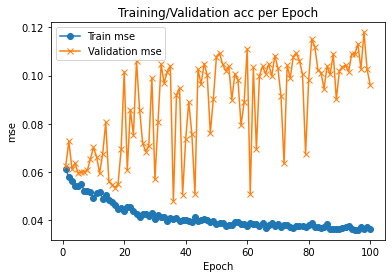

In [44]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['mse'], 'o-')
ax.plot([None] + hist.history['val_mse'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train mse', 'Validation mse'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('mse')

Text(0, 0.5, 'Loss')

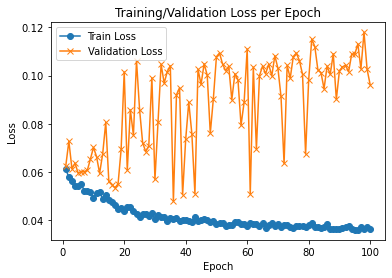

In [45]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [46]:
#when you compile the model, add your custom loss function as a metric
model.compile(loss='mse', optimizer='adam', metrics=['mse', r_square])

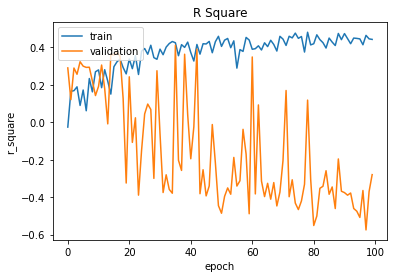

In [47]:
#plot from history
plt.plot(hist.history['r_square'])
plt.plot(hist.history['val_r_square'])
plt.title('R Square')
plt.ylabel('r_square')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')